# Data Preparation

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
data=pd.DataFrame(pd.read_csv('kidney_disease.csv'))

In [3]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps',
            'bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume',
            'white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease',
            'appetite','pedal_edema','anemia','class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.drop(columns='id',inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [6]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)

C:\Users\JAYNIL\AppData\Local\Temp\ipykernel_16416\2135572840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
C:\Users\JAYNIL\AppData\Local\Temp\ipykernel_16416\2135572840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [8]:
data['red_blood_cell_count']=data['red_blood_cell_count'].replace('\t?',np.nan)

data['white_blood_cell_count']=data['white_blood_cell_count'].replace('\t?',np.nan)
data['white_blood_cell_count']=data['white_blood_cell_count'].replace('\t6200','6200')
data['white_blood_cell_count']=data['white_blood_cell_count'].replace('\t8400',np.nan)

data['packed_cell_volume']=data['packed_cell_volume'].replace('\t?',np.nan)
data['packed_cell_volume']=data['packed_cell_volume'].replace('\t43',np.nan)



data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mode()[0],inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mode()[0],inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode()[0],inplace=True)

C:\Users\JAYNIL\AppData\Local\Temp\ipykernel_16416\2455515880.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mode()[0],inplace=True)
C:\Users\JAYNIL\AppData\Local\Temp\ipykernel_16416\2455515880.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [10]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
catcols

{'anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'packed_cell_volume',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'white_blood_cell_count'}

In [11]:
for i in catcols:
    print('Column',i)
    print(Counter(data[i]))
    print('*'*120+'\n')

Column appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Column anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Column class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Column red_blood_cell_count
Counter({'5.2': 149, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0'

In [12]:
data['class']=data['class'].replace('ckd\t','ckd')
data['coronary_artery_disease']=data['coronary_artery_disease'].replace('\tno','no')
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')


for i in catcols:
    print('Column',i)
    print(Counter(data[i]))
    print('*'*120+'\n')

Column appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Column anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Column class
Counter({'ckd': 250, 'notckd': 150})
************************************************************************************************************************

Column red_blood_cell_count
Counter({'5.2': 149, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 

In [13]:
catcols.remove('red_blood_cell_count')
catcols.remove('white_blood_cell_count')
catcols.remove('packed_cell_volume')

print(catcols)

{'appetite', 'anemia', 'class', 'pus_cell', 'diabetesmellitus', 'coronary_artery_disease', 'bacteria', 'hypertension', 'red_blood_cells', 'pedal_edema', 'pus_cell_clumps'}


In [14]:
catcols=['hypertension', 'class', 'red_blood_cells', 'pus_cell_clumps',
         'diabetesmellitus', 'anemia', 'pus_cell', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'bacteria']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
for i in catcols:
    print('Label for:',i)
    le=LabelEncoder()
    print('before encoding:',Counter(data[i]))
    data[i]=le.fit_transform(data[i])
    print('after encoding:',Counter(data[i]))
    print('*'*120+'\n')
    

Label for: hypertension
before encoding: Counter({'no': 253, 'yes': 147})
after encoding: Counter({0: 253, 1: 147})
************************************************************************************************************************

Label for: class
before encoding: Counter({'ckd': 250, 'notckd': 150})
after encoding: Counter({0: 250, 1: 150})
************************************************************************************************************************

Label for: red_blood_cells
before encoding: Counter({'normal': 353, 'abnormal': 47})
after encoding: Counter({1: 353, 0: 47})
************************************************************************************************************************

Label for: pus_cell_clumps
before encoding: Counter({'notpresent': 358, 'present': 42})
after encoding: Counter({0: 358, 1: 42})
************************************************************************************************************************

Label for: diabetesmellitus


In [17]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
contcols

{'age',
 'albumin',
 'anemia',
 'appetite',
 'bacteria',
 'blood_glucose_random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'specific_gravity',
 'sugar'}

In [18]:
contcols={'blood_urea','serum_creatinine','specific_gravity','albumin','blood_pressure','blood_glucose_random','sugar','sodium','hemoglobin',
          'age','potassium'}

In [19]:
for i in contcols:
    print('Continous cols',i)
    print(Counter(data[i]))
    print('*'*120+'\n')

Continous cols blood_urea
Counter({57.425721784776904: 19, 46.0: 15, 25.0: 13, 19.0: 11, 40.0: 10, 18.0: 9, 50.0: 9, 15.0: 9, 48.0: 9, 26.0: 8, 27.0: 8, 32.0: 8, 49.0: 8, 36.0: 7, 28.0: 7, 20.0: 7, 17.0: 7, 38.0: 7, 16.0: 7, 30.0: 7, 44.0: 7, 31.0: 6, 45.0: 6, 39.0: 6, 29.0: 6, 24.0: 6, 37.0: 6, 22.0: 6, 23.0: 6, 53.0: 5, 55.0: 5, 33.0: 5, 66.0: 5, 35.0: 5, 42.0: 5, 47.0: 4, 51.0: 4, 34.0: 4, 68.0: 4, 41.0: 4, 60.0: 3, 107.0: 3, 80.0: 3, 96.0: 3, 52.0: 3, 106.0: 3, 125.0: 3, 56.0: 2, 54.0: 2, 72.0: 2, 86.0: 2, 90.0: 2, 87.0: 2, 155.0: 2, 153.0: 2, 77.0: 2, 89.0: 2, 111.0: 2, 73.0: 2, 98.0: 2, 82.0: 2, 132.0: 2, 58.0: 2, 10.0: 2, 162.0: 1, 148.0: 1, 180.0: 1, 163.0: 1, 75.0: 1, 65.0: 1, 103.0: 1, 70.0: 1, 202.0: 1, 114.0: 1, 164.0: 1, 142.0: 1, 391.0: 1, 92.0: 1, 139.0: 1, 85.0: 1, 186.0: 1, 217.0: 1, 88.0: 1, 118.0: 1, 50.1: 1, 71.0: 1, 21.0: 1, 219.0: 1, 166.0: 1, 208.0: 1, 176.0: 1, 145.0: 1, 165.0: 1, 322.0: 1, 235.0: 1, 76.0: 1, 113.0: 1, 1.5: 1, 146.0: 1, 133.0: 1, 137.0: 1, 67.0:

In [20]:
contcols.remove('specific_gravity')
contcols.remove('sugar')
contcols.remove('albumin')
print(contcols)

{'blood_urea', 'potassium', 'blood_pressure', 'serum_creatinine', 'hemoglobin', 'age', 'sodium', 'blood_glucose_random'}


In [21]:
contcols.add('red_blood_cell_count')
contcols.add('white_blood_cell_count')
contcols.add('packed_cell_volume')
print(contcols)

{'red_blood_cell_count', 'blood_urea', 'packed_cell_volume', 'potassium', 'white_blood_cell_count', 'blood_pressure', 'serum_creatinine', 'hemoglobin', 'age', 'sodium', 'blood_glucose_random'}


In [22]:
catcols.append('specific_gravity')
catcols.append('sugar')
catcols.append('albumin')
print(catcols)

['hypertension', 'class', 'red_blood_cells', 'pus_cell_clumps', 'diabetesmellitus', 'anemia', 'pus_cell', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'bacteria', 'specific_gravity', 'sugar', 'albumin']


# Exploratory Data Analysis

In [23]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,148.036517,...,137.528754,4.627244,12.526437,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,74.782634,...,9.204273,2.819783,2.716171,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,4.500000,2.500000,3.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,135.000000,4.000000,10.875000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,137.528754,4.627244,12.526437,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,141.000000,4.800000,14.625000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,163.000000,47.000000,17.800000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\JAYNIL\AppData\Local\Temp\ipykernel_16416\4156840497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

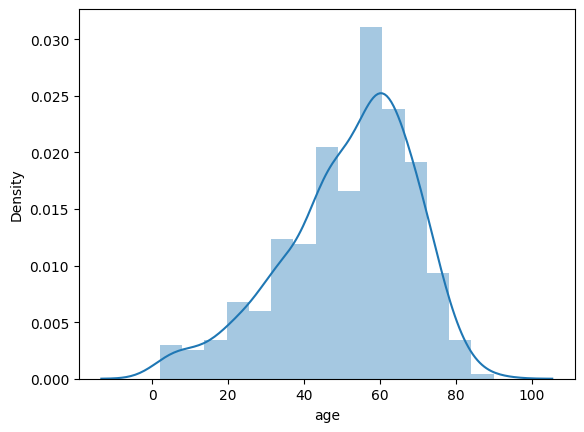

In [25]:
sns.distplot(data.age)

Text(0.5, 1.0, 'Age vs Blood_Pressure')

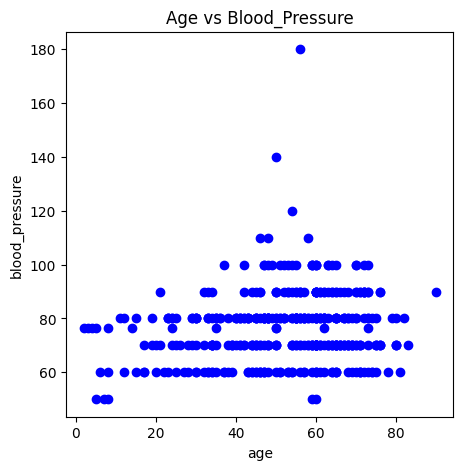

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(x=data.age,y=data.blood_pressure,color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title('Age vs Blood_Pressure')

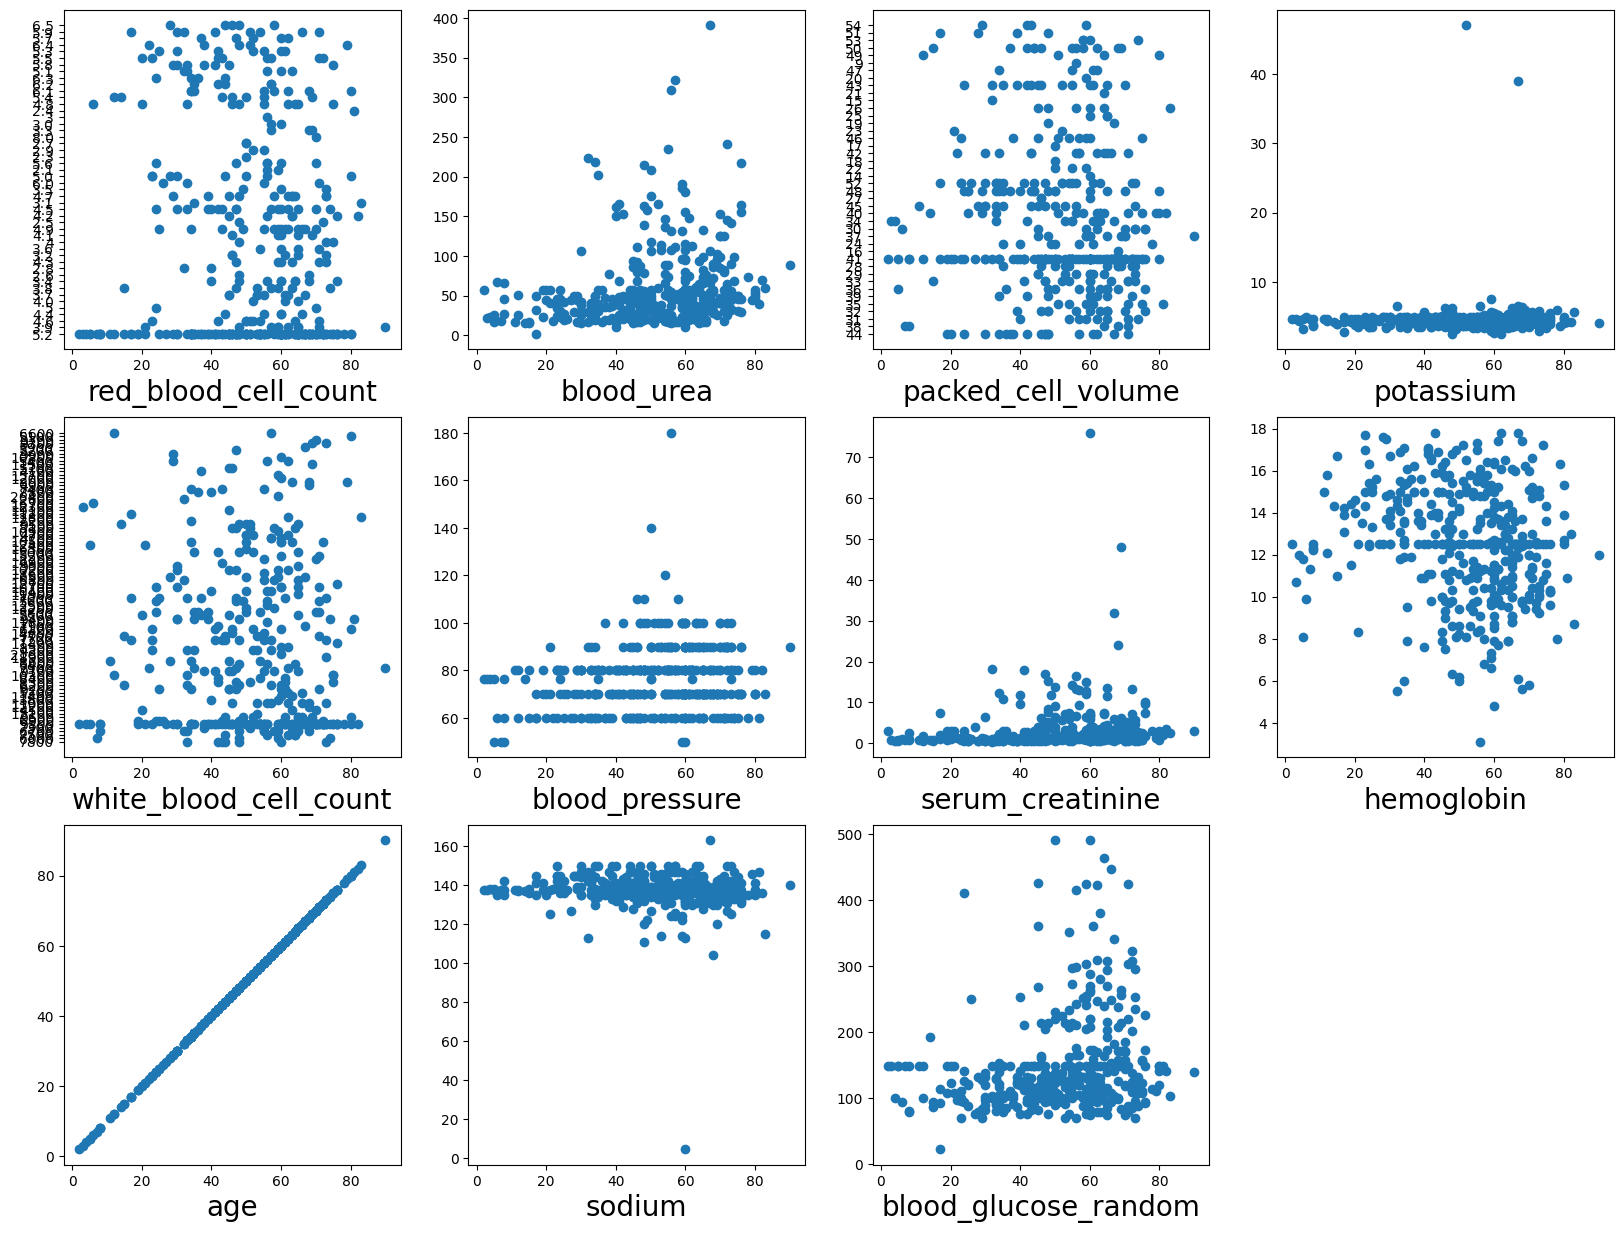

In [27]:
plt.figure(figsize=(20,15),facecolor='white')
plot_num=1

for col in contcols:
    if plot_num<=11:
        ax=plt.subplot(3,4,plot_num)
        plt.scatter(data['age'],data[col])
        plt.xlabel(col,fontsize=20)
    plot_num+=1
plt.show()    

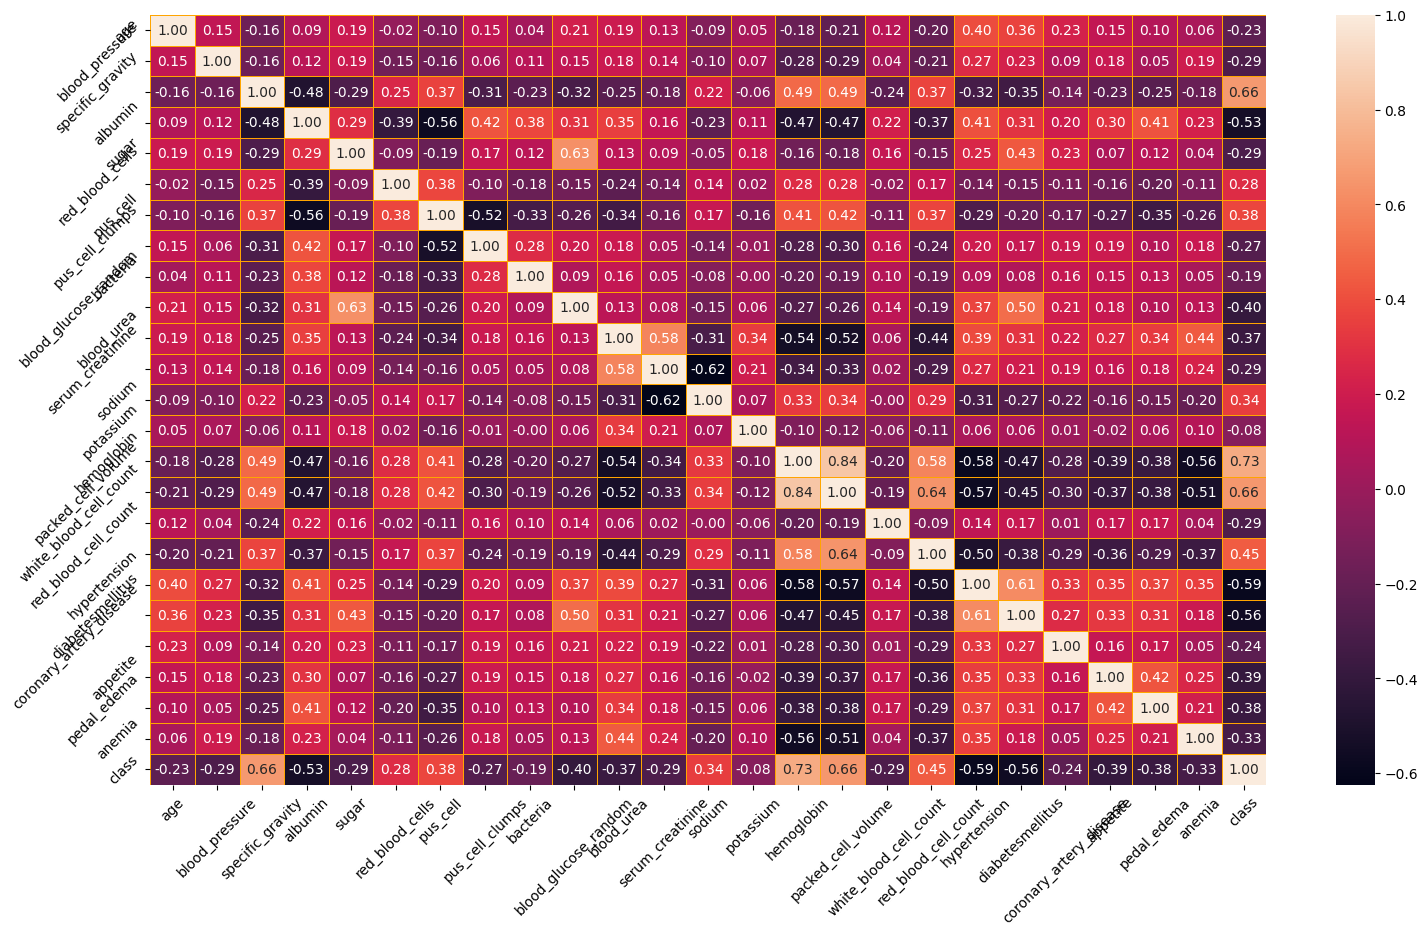

In [28]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor='orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

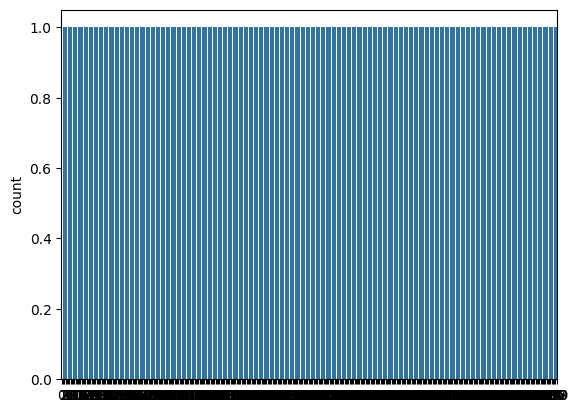

In [29]:
sns.countplot(data['class'])

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
selcols=['red_blood_cells','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']

X=pd.DataFrame(data,columns=selcols)
y=data['class']



print(X.shape)
print(y.shape)

(400, 8)
(400,)


In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

smote=SMOTE(random_state=42)

# X_train,y_train=smote.fit_resample(X_train,y_train)


# Model Building

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [34]:
classification=Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [35]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
classification.fit(X_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5433 - loss: 4.5690 - val_accuracy: 0.5938 - val_loss: 0.6152
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 0.5974 - val_accuracy: 0.5938 - val_loss: 0.6342
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6580 - loss: 0.5390 - val_accuracy: 0.6875 - val_loss: 0.5307
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6526 - loss: 0.5420 - val_accuracy: 0.6406 - val_loss: 0.5737
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 0.5480 - val_accuracy: 0.6250 - val_loss: 0.5996
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - loss: 0.6415 - val_accuracy: 0.6562 - val_loss: 0.5270
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6468 - loss: 0.5208 - val_accuracy: 0.5781 - val_loss: 0.5161
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6604 - loss: 0.5554 - val_accuracy: 0.5781 - v

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42,class_weight='balanced')

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=42)

In [39]:
y_pred=rfc.predict(X_test)
y_pred_train=rfc.predict(X_train)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc=DecisionTreeClassifier(random_state=42,class_weight='balanced')


In [42]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [43]:
y_pred=dtc.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [44]:
y_pred_train=dtc.predict(X_train)

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
lgr=LogisticRegression(random_state=42,solver='liblinear',class_weight='balanced')

In [47]:
lgr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [48]:
y_pred=lgr.predict(X_test)
y_pred_train=lgr.predict(X_train)

In [49]:
from sklearn.metrics import accuracy_score,classification_report

In [50]:
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)

[0]


C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)

[0]


C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)

[0]


C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
classification.save('ckd.h5')

In [54]:
y_pred=classification.predict(X_test)
print(y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[3.12661141e-01]
 [9.00769413e-01]
 [1.26431976e-03]
 [9.78700593e-11]
 [1.97617100e-09]
 [4.91327549e-17]
 [9.02437389e-01]
 [3.43437307e-04]
 [6.14137411e-01]
 [7.92748645e-10]
 [1.17411594e-10]
 [8.86445403e-01]
 [4.67737099e-15]
 [1.38740925e-05]
 [4.03963945e-13]
 [8.97872145e-04]
 [8.08241129e-01]
 [8.34911346e-01]
 [2.03435775e-08]
 [7.72677183e-01]
 [1.40801028e-04]
 [5.01344842e-14]
 [8.47496510e-01]
 [8.60106170e-01]
 [1.23468246e-02]
 [9.16190684e-01]
 [1.43437623e-03]
 [9.14974260e-12]
 [7.07828045e-01]
 [3.64129448e-07]
 [5.87906003e-01]
 [1.98451797e-21]
 [7.49710917e-01]
 [6.19108985e-14]
 [1.68409842e-05]
 [9.59125347e-03]
 [6.18794875e-05]
 [6.69813275e-01]
 [1.91131977e-09]
 [7.72896385e-07]
 [5.06323516e-01]
 [1.38931893e-04]
 [8.98304055e-13]
 [6.63153287e-06]
 [3.64994848e-05]
 [9.02952671e-01]
 [1.74662247e-01]
 [3.59605365e-02]
 [1.45953670e-14]
 [7.98629284e-01]
 [1.52971372e-02]
 [8.64391446e-01]
 [6.33030772e-01]
 [3.2845

In [55]:
y_pred=(y_pred>0.5)

In [56]:
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [57]:
def pred_exit(sample_val):

    sample_np=np.array(sample_val)
    sample_reshaped=sample_np.reshape(1,-1)
    sample_scaled=sc.transform(sample_reshaped)
    return classification.predict(sample_scaled)

In [58]:
test=pred_exit([1,1,121.000000,36.0,0,0,1,0])

if test==1:
    print('Higher chances of ckd')
else:
    print('Lower chance of ckd')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Lower chance of ckd


C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Performance Testing & Evaluate the results

In [59]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix


for ANN

[[51  1]
 [ 0 28]]


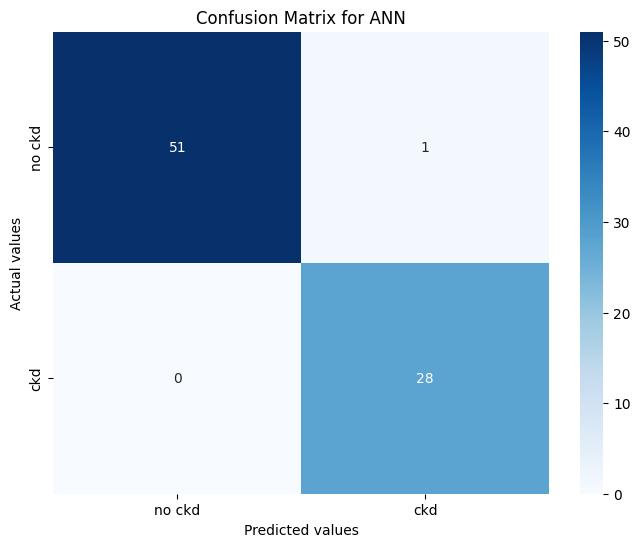

In [60]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN')
plt.show()

For other models


C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogReg
              precision    recall  f1-score   support

      NO CKD       0.98      0.98      0.98        52
         CKD       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

[[51  1]
 [ 1 27]]


C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JAYNIL\python\panda\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

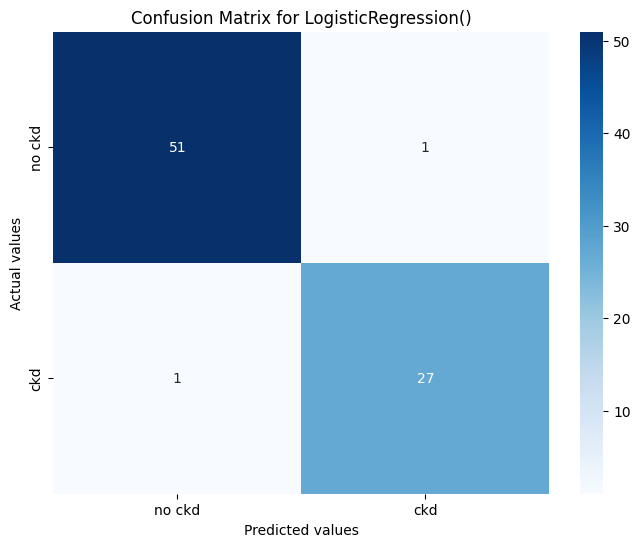

RF
              precision    recall  f1-score   support

      NO CKD       0.98      0.98      0.98        52
         CKD       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

[[51  1]
 [ 1 27]]


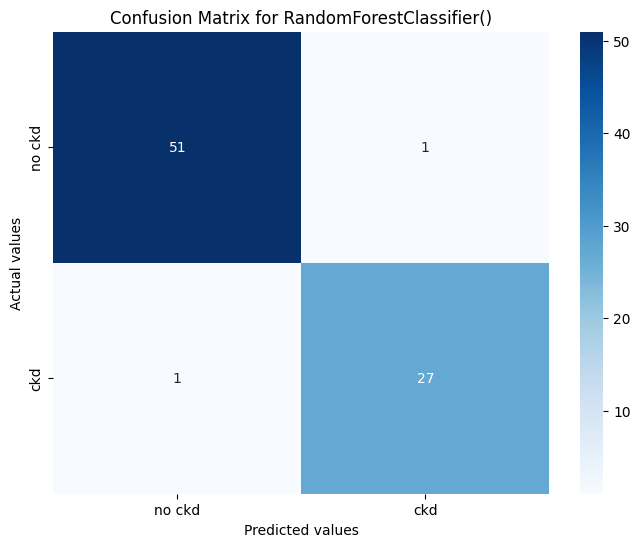

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.94      0.96      0.95        52
         CKD       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

[[50  2]
 [ 3 25]]


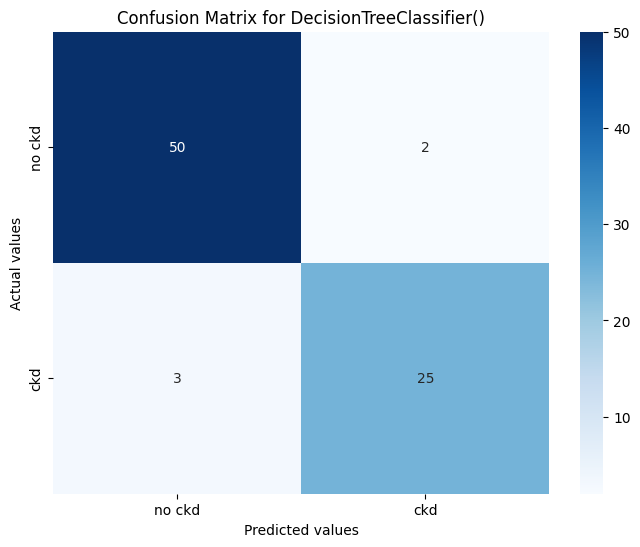

In [61]:
def compare():
    dfs=[]
    models=[('LogReg',LogisticRegression()),('RF',RandomForestClassifier()),('DecisionTree',DecisionTreeClassifier())]
    results=[]
    names=[]
    scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
    target_names=['NO CKD','CKD']
    
    for name,model in models:
        kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
        cv_results=model_selection.cross_validate(model,X_train,y_train,cv=kfold,scoring=scoring)
        clf=model.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        print(name)
        print(classification_report(y_test,y_pred,target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df=pd.DataFrame(cv_results)
        this_df['model']=name
        dfs.append(this_df)

        cm=confusion_matrix(y_test,y_pred)
        print(cm)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
        plt.xlabel('Predicted values')
        plt.ylabel('Actual values')
        plt.title(f'Confusion Matrix for {model}')
        plt.show()
    final=pd.concat(dfs,ignore_index=True)    
    return final
final=compare()    

In [62]:
bootstraps=[]
for model in list(set(final.model.values)):
    model_df=final.loc[final.model == model]
    bootstrap=model_df.sample(n=30,replace=True)
    bootstraps.append(bootstrap)
    
bootstrap_df=pd.concat(bootstraps,ignore_index=True)
results_long=pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics=['fit_time','score_time']

results_long_nofit=results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit=results_long_nofit.sort_values(by='values')

results_long_fit=results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit=results_long_fit.sort_values(by='values')

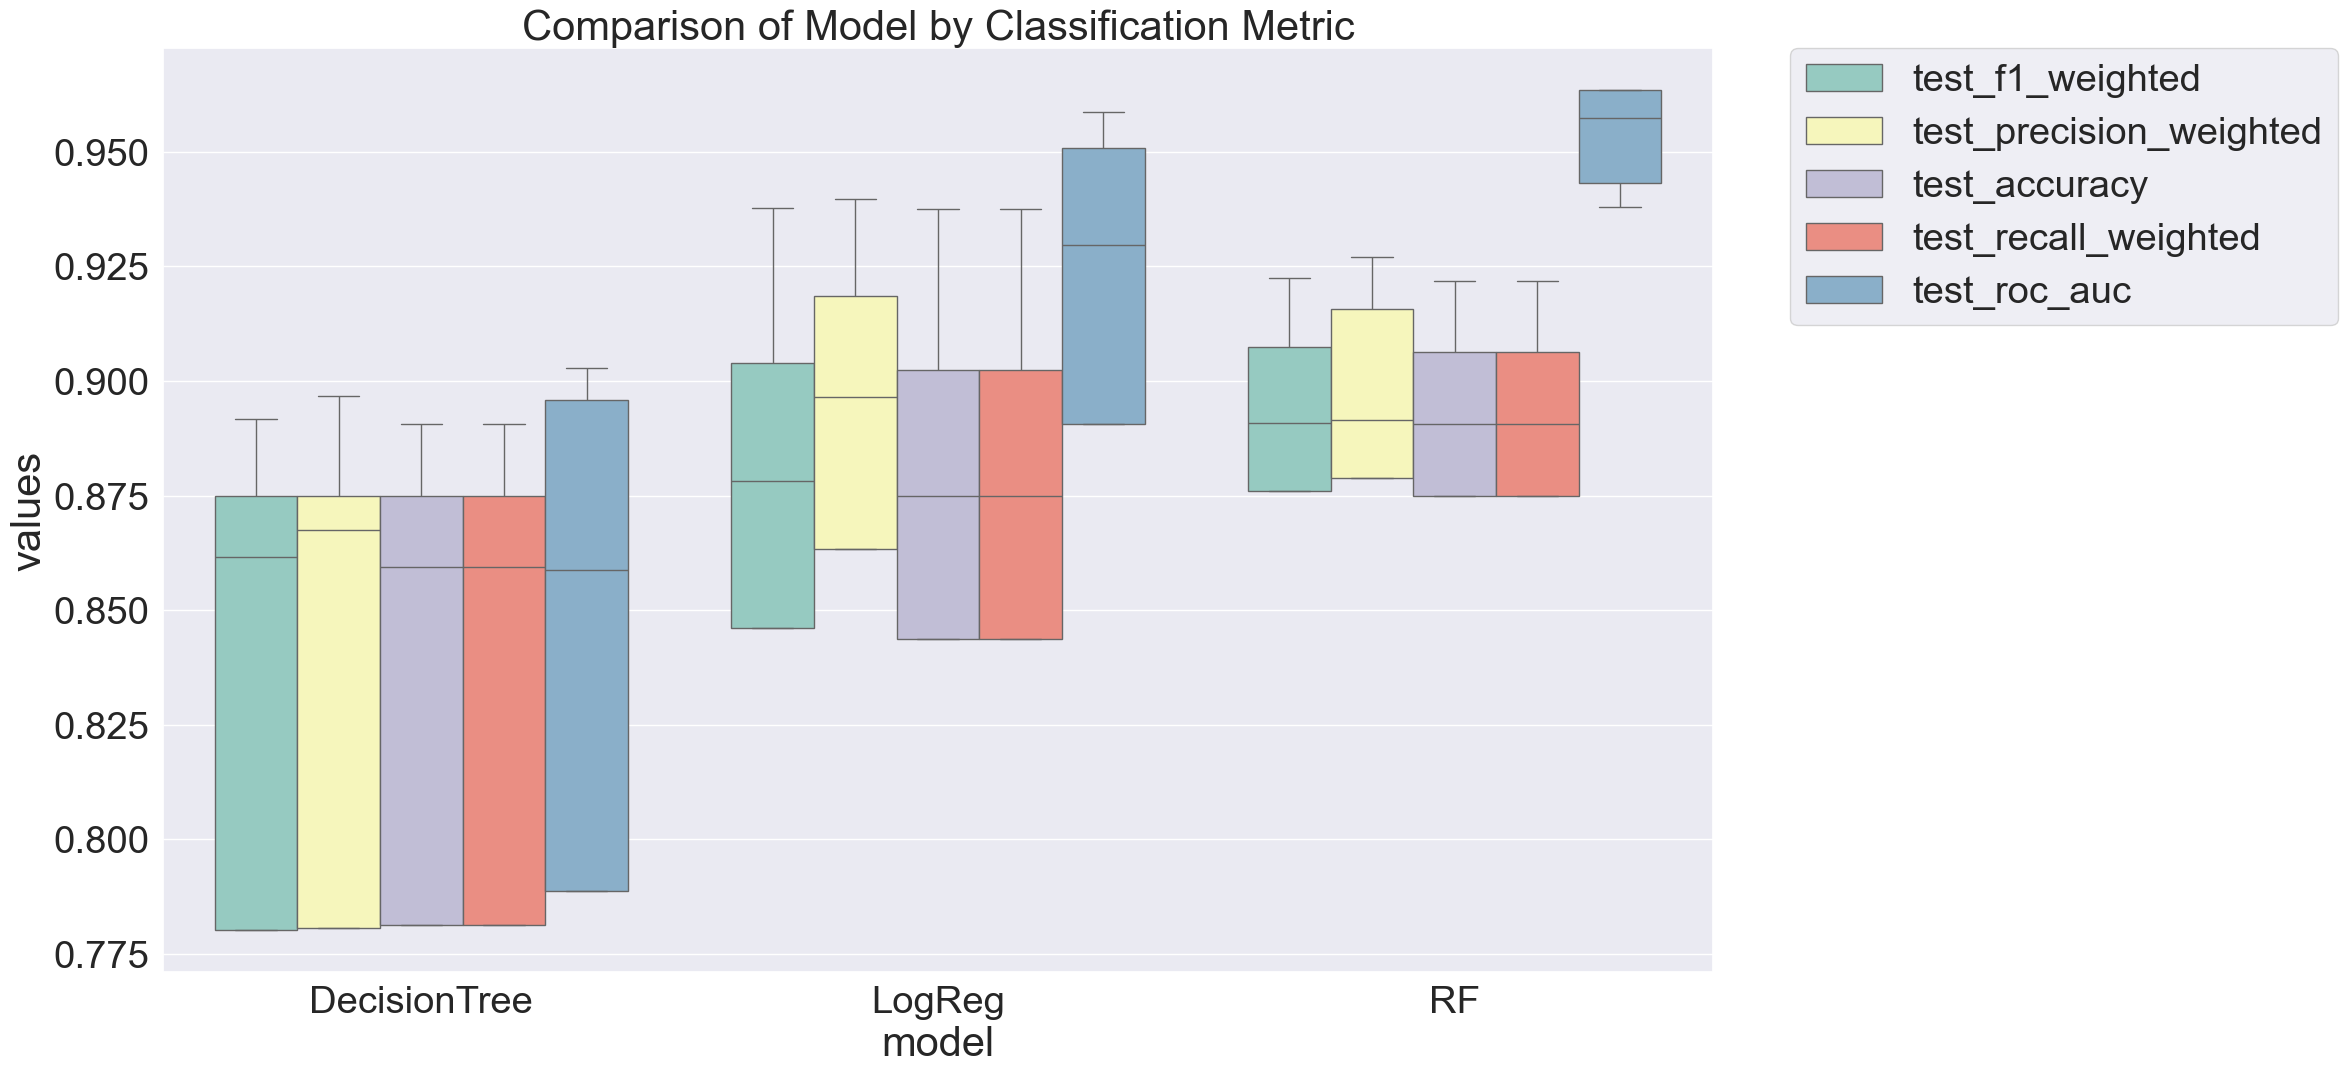

In [63]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g=sns.boxplot(x='model',y='values',hue='metrics',data=results_long_nofit,palette='Set3')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_model_performance.png',dpi=300)

# Model Deployment

In [64]:
import pickle

In [65]:
pickle.dump(lgr,open('CKD_m2.pkl','wb'))